<a href="https://colab.research.google.com/github/nliza/FP_DataMining/blob/main/pemodelan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [6]:
#membuat fungsi untuk evaluasi model
def evaluate_model(y_test, y_pred, y_prob, model_name):
    # Akurasi
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy:", accuracy)

    # Confusion Matrix dan Classification Report
    print(f"Confusion Matrix ({model_name}):")
    print(confusion_matrix(y_test, y_pred))
    print(f"Classification Report ({model_name}):")
    print(classification_report(y_test, y_pred))

    # AUC
    auc_score = roc_auc_score(y_test, y_prob)
    print(f"{model_name} AUC:", auc_score)

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({model_name})')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Female Daily/review_FemaleDaily_stemmed.csv')

In [8]:
X = data['stemmed_tokens']
y = data['Status']

In [9]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [10]:
tfidf = TfidfVectorizer(max_features=5000)

In [12]:
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [13]:
X_train_tfidf_80 = tfidf.fit_transform(X_train_80)
X_test_tfidf_80 = tfidf.transform(X_test_80)

===== Skenario 1: Naive Bayes (80:20) =====
Naive Bayes (80:20) Accuracy: 0.8590308370044053
Confusion Matrix (Naive Bayes (80:20)):
[[194   0]
 [ 32   1]]
Classification Report (Naive Bayes (80:20)):
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       194
           1       1.00      0.03      0.06        33

    accuracy                           0.86       227
   macro avg       0.93      0.52      0.49       227
weighted avg       0.88      0.86      0.80       227

Naive Bayes (80:20) AUC: 0.8416119962511716


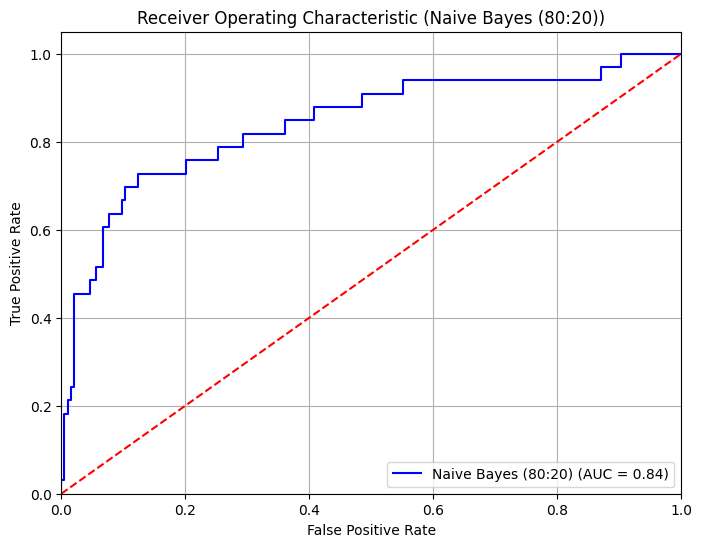

In [14]:
print("===== Skenario 1: Naive Bayes (80:20) =====")
nb_model_80 = MultinomialNB()
nb_model_80.fit(X_train_tfidf_80, y_train_80)

# Prediksi
y_pred_nb_80 = nb_model_80.predict(X_test_tfidf_80)
y_prob_nb_80 = nb_model_80.predict_proba(X_test_tfidf_80)[:, 1]

# Evaluasi
evaluate_model(y_test_80, y_pred_nb_80, y_prob_nb_80, "Naive Bayes (80:20)")

===== Skenario 2: SVM (80:20) =====
SVM (80:20) Accuracy: 0.8854625550660793
Confusion Matrix (SVM (80:20)):
[[194   0]
 [ 26   7]]
Classification Report (SVM (80:20)):
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       194
           1       1.00      0.21      0.35        33

    accuracy                           0.89       227
   macro avg       0.94      0.61      0.64       227
weighted avg       0.90      0.89      0.85       227

SVM (80:20) AUC: 0.8328647297719463


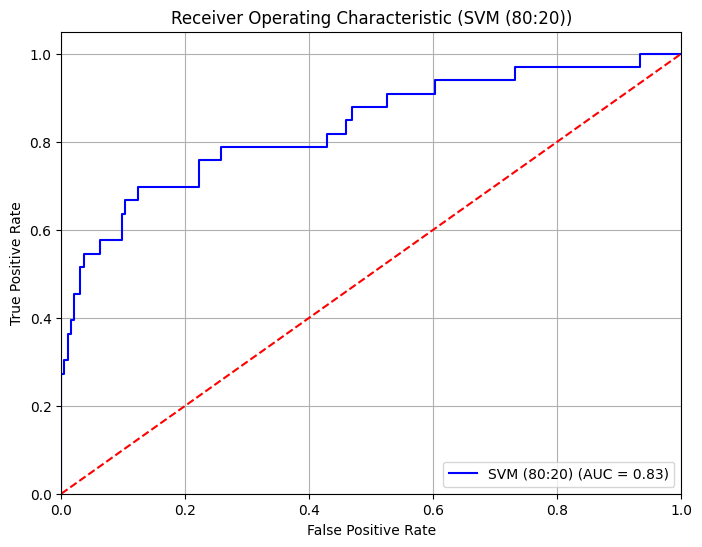

In [15]:
print("===== Skenario 2: SVM (80:20) =====")
svm_model_80 = SVC(probability=True)
svm_model_80.fit(X_train_tfidf_80, y_train_80)

# Prediksi
y_pred_svm_80 = svm_model_80.predict(X_test_tfidf_80)
y_prob_svm_80 = svm_model_80.predict_proba(X_test_tfidf_80)[:, 1]

# Evaluasi
evaluate_model(y_test_80, y_pred_svm_80, y_prob_svm_80, "SVM (80:20)")

In [16]:
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


In [17]:
X_train_tfidf_70 = tfidf.fit_transform(X_train_70)
X_test_tfidf_70 = tfidf.transform(X_test_70)

===== Skenario 3: Naive Bayes (70:30) =====
Naive Bayes (70:30) Accuracy: 0.8592375366568915
Confusion Matrix (Naive Bayes (70:30)):
[[293   0]
 [ 48   0]]
Classification Report (Naive Bayes (70:30)):
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       293
           1       0.00      0.00      0.00        48

    accuracy                           0.86       341
   macro avg       0.43      0.50      0.46       341
weighted avg       0.74      0.86      0.79       341

Naive Bayes (70:30) AUC: 0.8236632536973835


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


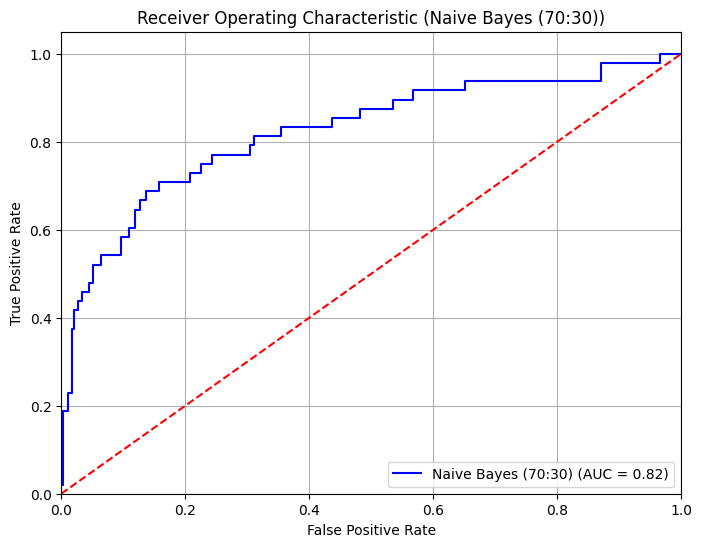

In [18]:
print("===== Skenario 3: Naive Bayes (70:30) =====")
nb_model_70 = MultinomialNB()
nb_model_70.fit(X_train_tfidf_70, y_train_70)

# Prediksi
y_pred_nb_70 = nb_model_70.predict(X_test_tfidf_70)
y_prob_nb_70 = nb_model_70.predict_proba(X_test_tfidf_70)[:, 1]

# Evaluasi
evaluate_model(y_test_70, y_pred_nb_70, y_prob_nb_70, "Naive Bayes (70:30)")

===== Skenario 4: SVM (70:30) =====
SVM (70:30) Accuracy: 0.8885630498533724
Confusion Matrix (SVM (70:30)):
[[293   0]
 [ 38  10]]
Classification Report (SVM (70:30)):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       293
           1       1.00      0.21      0.34        48

    accuracy                           0.89       341
   macro avg       0.94      0.60      0.64       341
weighted avg       0.90      0.89      0.86       341

SVM (70:30) AUC: 0.8467718998862344


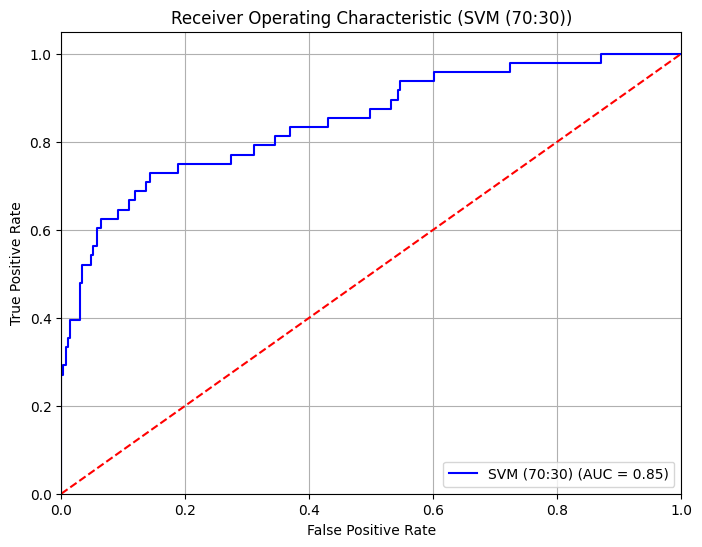

In [19]:
print("===== Skenario 4: SVM (70:30) =====")
svm_model_70 = SVC(probability=True)
svm_model_70.fit(X_train_tfidf_70, y_train_70)

# Prediksi
y_pred_svm_70 = svm_model_70.predict(X_test_tfidf_70)
y_prob_svm_70 = svm_model_70.predict_proba(X_test_tfidf_70)[:, 1]

# Evaluasi
evaluate_model(y_test_70, y_pred_svm_70, y_prob_svm_70, "SVM (70:30)")

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# SMOTE pada split 80:20
X_train_smote_80, y_train_smote_80 = smote.fit_resample(X_train_tfidf_80, y_train_80)

# SMOTE pada split 70:30
X_train_smote_70, y_train_smote_70 = smote.fit_resample(X_train_tfidf_70, y_train_70)

In [34]:
from collections import Counter
def print_class_distribution(y_before, y_after, split_ratio):
    before_count = Counter(y_before)
    after_count = Counter(y_after)
    print(f"\nDistribusi Data Sebelum dan Sesudah SMOTE ({split_ratio}):")
    print("---------------------------------------------------------------")
    for label in sorted(before_count.keys()):
        print(f"Kelas {label}:")
        print(f"  Sebelum SMOTE: {before_count[label]} data")
        print(f"  Setelah SMOTE: {after_count[label]} data")
    print(f"Total data sebelum SMOTE: {sum(before_count.values())}")
    print(f"Total data setelah SMOTE: {sum(after_count.values())}\n")

print_class_distribution(y_train_80, y_train_smote_80, "80:20")
print_class_distribution(y_train_70, y_train_smote_70, "70:30")


Distribusi Data Sebelum dan Sesudah SMOTE (80:20):
---------------------------------------------------------------
Kelas 0:
  Sebelum SMOTE: 770 data
  Setelah SMOTE: 770 data
Kelas 1:
  Sebelum SMOTE: 138 data
  Setelah SMOTE: 770 data
Total data sebelum SMOTE: 908
Total data setelah SMOTE: 1540


Distribusi Data Sebelum dan Sesudah SMOTE (70:30):
---------------------------------------------------------------
Kelas 0:
  Sebelum SMOTE: 671 data
  Setelah SMOTE: 671 data
Kelas 1:
  Sebelum SMOTE: 123 data
  Setelah SMOTE: 671 data
Total data sebelum SMOTE: 794
Total data setelah SMOTE: 1342



===== Skenario 1: Naive Bayes (80:20) dengan SMOTE =====
Naive Bayes (80:20) dengan SMOTE Accuracy: 0.8458149779735683
Confusion Matrix (Naive Bayes (80:20) dengan SMOTE):
[[169  25]
 [ 10  23]]
Classification Report (Naive Bayes (80:20) dengan SMOTE):
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       194
           1       0.48      0.70      0.57        33

    accuracy                           0.85       227
   macro avg       0.71      0.78      0.74       227
weighted avg       0.88      0.85      0.86       227

Naive Bayes (80:20) dengan SMOTE AUC: 0.8616057482036863


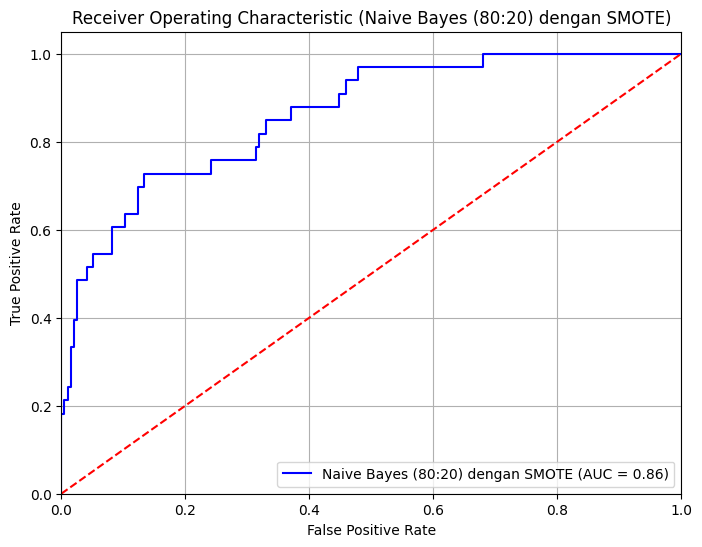

In [38]:
print("===== Skenario 1: Naive Bayes (80:20) dengan SMOTE =====")
nb_model_smote_80 = MultinomialNB()
nb_model_smote_80.fit(X_train_smote_80, y_train_smote_80)

# Prediksi
y_pred_nb_smote_80 = nb_model_smote_80.predict(X_test_tfidf_80)
y_prob_nb_smote_80 = nb_model_smote_80.predict_proba(X_test_tfidf_80)[:, 1]

# Evaluasi
evaluate_model(y_test_80, y_pred_nb_smote_80, y_prob_nb_smote_80, "Naive Bayes (80:20) dengan SMOTE")

===== Skenario 2: SVM (80:20) dengan SMOTE =====
SVM (80:20) dengan SMOTE Accuracy: 0.8942731277533039
Confusion Matrix (SVM (80:20) dengan SMOTE):
[[193   1]
 [ 23  10]]
Classification Report (SVM (80:20) dengan SMOTE):
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       194
           1       0.91      0.30      0.45        33

    accuracy                           0.89       227
   macro avg       0.90      0.65      0.70       227
weighted avg       0.90      0.89      0.87       227

SVM (80:20) dengan SMOTE AUC: 0.823336457357076


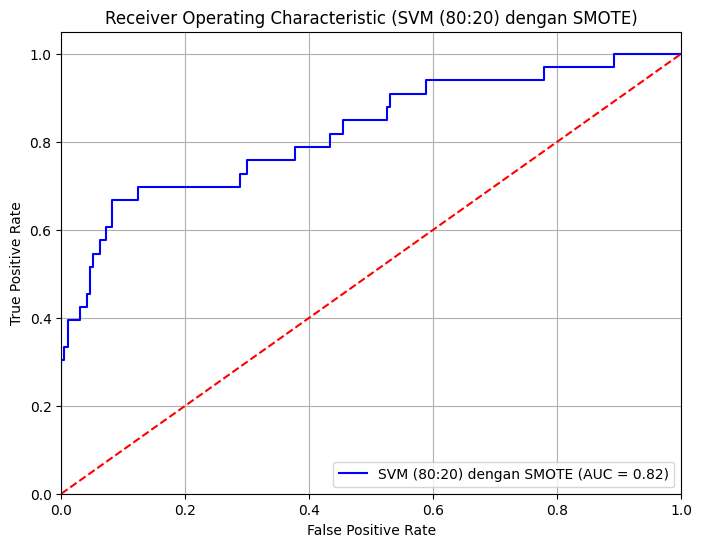

In [39]:
# Skenario 2: SVM (80:20) dengan SMOTE
print("===== Skenario 2: SVM (80:20) dengan SMOTE =====")
svm_model_smote_80 = SVC(probability=True)
svm_model_smote_80.fit(X_train_smote_80, y_train_smote_80)

# Prediksi
y_pred_svm_smote_80 = svm_model_smote_80.predict(X_test_tfidf_80)
y_prob_svm_smote_80 = svm_model_smote_80.predict_proba(X_test_tfidf_80)[:, 1]

# Evaluasi
evaluate_model(y_test_80, y_pred_svm_smote_80, y_prob_svm_smote_80, "SVM (80:20) dengan SMOTE")

===== Skenario 3: Naive Bayes (70:30) dengan SMOTE =====
Naive Bayes (70:30) dengan SMOTE Accuracy: 0.8269794721407625
Confusion Matrix (Naive Bayes (70:30) dengan SMOTE):
[[249  44]
 [ 15  33]]
Classification Report (Naive Bayes (70:30) dengan SMOTE):
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       293
           1       0.43      0.69      0.53        48

    accuracy                           0.83       341
   macro avg       0.69      0.77      0.71       341
weighted avg       0.87      0.83      0.84       341

Naive Bayes (70:30) dengan SMOTE AUC: 0.8479806598407281


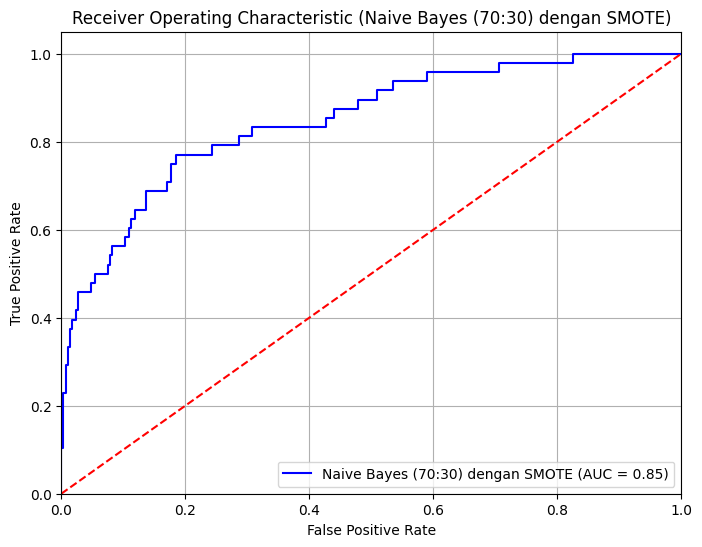

In [40]:
# Skenario 3: Naive Bayes (70:30) dengan SMOTE
print("===== Skenario 3: Naive Bayes (70:30) dengan SMOTE =====")
nb_model_smote_70 = MultinomialNB()
nb_model_smote_70.fit(X_train_smote_70, y_train_smote_70)

# Prediksi
y_pred_nb_smote_70 = nb_model_smote_70.predict(X_test_tfidf_70)
y_prob_nb_smote_70 = nb_model_smote_70.predict_proba(X_test_tfidf_70)[:, 1]

# Evaluasi
evaluate_model(y_test_70, y_pred_nb_smote_70, y_prob_nb_smote_70, "Naive Bayes (70:30) dengan SMOTE")

===== Skenario 4: SVM (70:30) dengan SMOTE =====
SVM (70:30) dengan SMOTE Accuracy: 0.906158357771261
Confusion Matrix (SVM (70:30) dengan SMOTE):
[[293   0]
 [ 32  16]]
Classification Report (SVM (70:30) dengan SMOTE):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       293
           1       1.00      0.33      0.50        48

    accuracy                           0.91       341
   macro avg       0.95      0.67      0.72       341
weighted avg       0.92      0.91      0.89       341

SVM (70:30) dengan SMOTE AUC: 0.8482650739476678


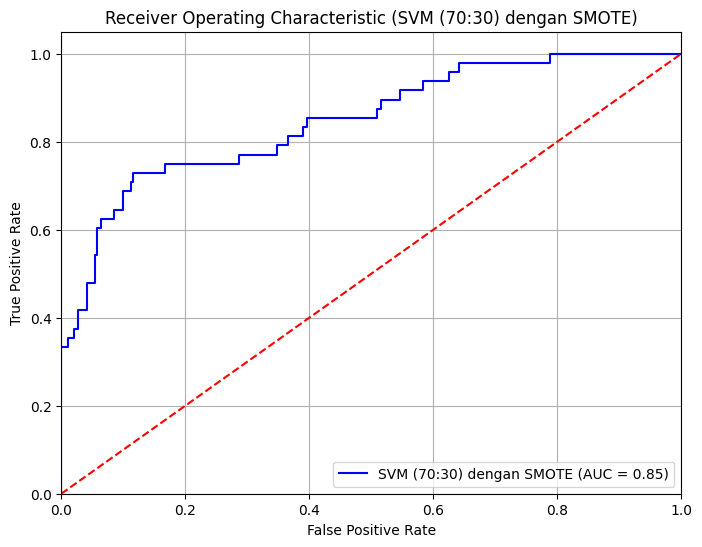

In [41]:
print("===== Skenario 4: SVM (70:30) dengan SMOTE =====")
svm_model_smote_70 = SVC(probability=True)
svm_model_smote_70.fit(X_train_smote_70, y_train_smote_70)

# Prediksi
y_pred_svm_smote_70 = svm_model_smote_70.predict(X_test_tfidf_70)
y_prob_svm_smote_70 = svm_model_smote_70.predict_proba(X_test_tfidf_70)[:, 1]

# Evaluasi
evaluate_model(y_test_70, y_pred_svm_smote_70, y_prob_svm_smote_70, "SVM (70:30) dengan SMOTE")

# **Menyimpan model ke file pickle**

In [53]:
import joblib

joblib.dump(svm_model_smote_70, '/content/drive/MyDrive/Female Daily/svm_model_smote_70.pkl')
joblib.dump(tfidf, '/content/drive/MyDrive/Female Daily/tfidf_vectorizer.pkl')

['/content/drive/MyDrive/Female Daily/tfidf_vectorizer.pkl']